In [1]:
import numpy as np
import string
import re
import random
from copy import copy
from string import ascii_lowercase, ascii_uppercase

import matplotlib.pyplot as plt

from typing import List, Dict

In [2]:
def preprocess_mess(message):
    space_pattern = re.compile(r'\s+')
    message = re.sub(space_pattern, '', message)
    
    translator = str.maketrans('', '', string.punctuation + '—')
    message = message.translate(translator)
    return message.lower()

def only_letters(message):
    result = []
    for c in message.lower():
        if c in ascii_lowercase:
            result.append(c)
    return ''.join(result)

In [3]:
def equal_chars_num(message, true_message):
    assert len(message) == len(true_message)
    return sum([1 if c1 == c2 else 0 for c1, c2 in zip(message, true_message)])

def apply_mapping(text, mapping):
    result = []
    for c in text:
        result.append(mapping[c])
    return ''.join(result)

In [4]:
def log_protocol(protocol, message, name):
    cipher = protocol.encode(message)
    decoded = protocol.decode(cipher)

    print(f'{name} cipher. Key = {protocol.key}')

    print('\nMessage:')
    print(message)

    print('\nCipher:')
    print(cipher)

    print('\nDecoded:')
    print(decoded)

In [5]:
with open('message.txt', mode='r') as f:
    raw_message = f.read()
    
message = only_letters(raw_message)
print(len(message))
message = message[:10000]
message

394615


'universityofcaliforniaberkeleyfromthecollectionofedwardhellmanhellerandelinorraashellerwilliamforbesmorganlwileyandputnamslibraryofamericanbookspoestalestalesbyedgarapoelondonwileyputnamwaterlooplaceenteredatstationershallcontentspaokthegoldbugtheblackcatmesmericrevelationlionizingthefallofthehouseofusheradescentintothemaelstromthecolloquyofmonosandunatheconversationofeirosandcharmionthemurdersintheruemorguethemysteryofmarierogettthepurloinedletterthemaninthecrowdtalesedgarapoethegoldbugwhathowhathothisfellowisdancingmadhehathbeenbittenbythetarantulaallinthewrongmanyyearsagoicontractedanintimacywithamrwilliamlegrandhewasofanancienthuguenotfamilyandhadoncebeenwealthybutaseriesofmisfortuneshadreducedhimtowanttoavoidthemortificationconsequentuponhisdisastersheleftneworleansthecityofhisforefathersandtookuphisresidenceatsullivansislandnearcharlestonsouthcarolinathisislandisaverysingularoneitconsistsoflittleelsethantheseasandandisaboutthreemileslongitsbreadthatnopointexceedsaquarterofamilei

In [6]:
class CaesarCipherProtocol:
    def __init__(self):
        self.key = random.randint(0, len(ascii_lowercase))
        
    def encode(self, message):
        mapping = { c: (2 * ascii_lowercase)[i + self.key] for i, c in enumerate(ascii_lowercase) }
        return apply_mapping(message, mapping).upper()
    
    def decode(self, cipher):
        mapping = { (2 * ascii_lowercase)[i + self.key]: c for i, c in enumerate(ascii_lowercase) }
        return apply_mapping(cipher.lower(), mapping)

In [7]:
log_protocol(protocol=CaesarCipherProtocol(), message=message, name='Caesar')

Caesar cipher. Key = 13

Message:
universityofcaliforniaberkeleyfromthecollectionofedwardhellmanhellerandelinorraashellerwilliamforbesmorganlwileyandputnamslibraryofamericanbookspoestalestalesbyedgarapoelondonwileyputnamwaterlooplaceenteredatstationershallcontentspaokthegoldbugtheblackcatmesmericrevelationlionizingthefallofthehouseofusheradescentintothemaelstromthecolloquyofmonosandunatheconversationofeirosandcharmionthemurdersintheruemorguethemysteryofmarierogettthepurloinedletterthemaninthecrowdtalesedgarapoethegoldbugwhathowhathothisfellowisdancingmadhehathbeenbittenbythetarantulaallinthewrongmanyyearsagoicontractedanintimacywithamrwilliamlegrandhewasofanancienthuguenotfamilyandhadoncebeenwealthybutaseriesofmisfortuneshadreducedhimtowanttoavoidthemortificationconsequentuponhisdisastersheleftneworleansthecityofhisforefathersandtookuphisresidenceatsullivansislandnearcharlestonsouthcarolinathisislandisaverysingularoneitconsistsoflittleelsethantheseasandandisaboutthreemileslongitsbreadt

In [8]:
def attack_caesar_cipher(message, cipher):
    tries = 0
    keys = list(range(len(ascii_uppercase)))
    random.shuffle(keys)
    
    for key in keys:
        tries += 1
        mapping = { (2 * ascii_uppercase)[i + key]: c for i, c in enumerate(ascii_uppercase) }
        
        current_message = apply_mapping(cipher, mapping).lower()
        if current_message == message:
            print('Attack successful.')
            print(f'Tries: {tries}')

In [9]:
protocol= CaesarCipherProtocol()
cipher = protocol.encode(message)
attack_caesar_cipher(message, cipher=cipher)

Attack successful.
Tries: 24


In [10]:
class SubstitutionCipherProtocol:
    def __init__(self):
        letters = list(ascii_lowercase)
        random.shuffle(letters)
        self.key = ''.join(letters)
        
    def encode(self, message):
        mapping = { c1: c2 for c1, c2 in zip(ascii_lowercase, self.key) }
        return apply_mapping(message, mapping).upper()
    
    def decode(self, cipher):
        mapping = { c2: c1 for c1, c2 in zip(ascii_lowercase, self.key) }
        return apply_mapping(cipher.lower(), mapping)

In [11]:
log_protocol(protocol=SubstitutionCipherProtocol(), message=message, name='Substitution')

Substitution cipher. Key = wjuetlxcrzihspnvfamkqbydog

Message:
universityofcaliforniaberkeleyfromthecollectionofedwardhellmanhellerandelinorraashellerwilliamforbesmorganlwileyandputnamslibraryofamericanbookspoestalestalesbyedgarapoelondonwileyputnamwaterlooplaceenteredatstationershallcontentspaokthegoldbugtheblackcatmesmericrevelationlionizingthefallofthehouseofusheradescentintothemaelstromthecolloquyofmonosandunatheconversationofeirosandcharmionthemurdersintheruemorguethemysteryofmarierogettthepurloinedletterthemaninthecrowdtalesedgarapoethegoldbugwhathowhathothisfellowisdancingmadhehathbeenbittenbythetarantulaallinthewrongmanyyearsagoicontractedanintimacywithamrwilliamlegrandhewasofanancienthuguenotfamilyandhadoncebeenwealthybutaseriesofmisfortuneshadreducedhimtowanttoavoidthemortificationconsequentuponhisdisastersheleftneworleansthecityofhisforefathersandtookuphisresidenceatsullivansislandnearcharlestonsouthcarolinathisislandisaverysingularoneitconsistsoflittleelsethantheseasandand

In [12]:
from collections import Counter
def draw_frequency(text: str) -> str:
    counts = list(sorted(Counter(text).items(), key=lambda x: x[0]))
    labels = [c[0] for c in counts]
    values = [c[1] for c in counts]
    plt.bar(range(len(labels)), values)
    plt.xticks(range(len(labels)), labels)
    plt.show()

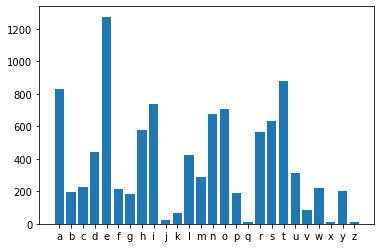

In [13]:
draw_frequency(message)

In [14]:
random.seed(1)
protocol = SubstitutionCipherProtocol()
cipher = protocol.encode(message)

In [15]:
cipher

'PATDWMUTOSHBLXRTBHMATXYWMJWRWSBMHQOZWLHRRWLOTHAHBWKIXMKZWRRQXAZWRRWMXAKWRTAHMMXXUZWRRWMITRRTXQBHMYWUQHMFXARITRWSXAKVPOAXQURTYMXMSHBXQWMTLXAYHHJUVHWUOXRWUOXRWUYSWKFXMXVHWRHAKHAITRWSVPOAXQIXOWMRHHVRXLWWAOWMWKXOUOXOTHAWMUZXRRLHAOWAOUVXHJOZWFHRKYPFOZWYRXLJLXOQWUQWMTLMWDWRXOTHARTHATETAFOZWBXRRHBOZWZHPUWHBPUZWMXKWULWAOTAOHOZWQXWRUOMHQOZWLHRRHGPSHBQHAHUXAKPAXOZWLHADWMUXOTHAHBWTMHUXAKLZXMQTHAOZWQPMKWMUTAOZWMPWQHMFPWOZWQSUOWMSHBQXMTWMHFWOOOZWVPMRHTAWKRWOOWMOZWQXATAOZWLMHIKOXRWUWKFXMXVHWOZWFHRKYPFIZXOZHIZXOZHOZTUBWRRHITUKXALTAFQXKZWZXOZYWWAYTOOWAYSOZWOXMXAOPRXXRRTAOZWIMHAFQXASSWXMUXFHTLHAOMXLOWKXATAOTQXLSITOZXQMITRRTXQRWFMXAKZWIXUHBXAXALTWAOZPFPWAHOBXQTRSXAKZXKHALWYWWAIWXROZSYPOXUWMTWUHBQTUBHMOPAWUZXKMWKPLWKZTQOHIXAOOHXDHTKOZWQHMOTBTLXOTHALHAUWGPWAOPVHAZTUKTUXUOWMUZWRWBOAWIHMRWXAUOZWLTOSHBZTUBHMWBXOZWMUXAKOHHJPVZTUMWUTKWALWXOUPRRTDXAUTURXAKAWXMLZXMRWUOHAUHPOZLXMHRTAXOZTUTURXAKTUXDWMSUTAFPRXMHAWTOLHAUTUOUHBRTOORWWRUWOZXAOZWUWXUXAKXAKTUXYHPOOZMWWQTRWURHAFTOUYMWXKOZXOAHVHTAOWCLWWKUXGPXMOWMHBXQTRWT

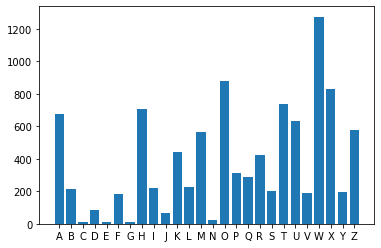

In [16]:
draw_frequency(cipher)

In [17]:
def vigenere_table() -> List[List[str]]:
    letters = list(ascii_lowercase)
    table = []
    for i in range(len(ascii_lowercase)):
        table.append(letters)
        letters = letters[1:] + [letters[0]]
    return table

def decode_vigenere(cipher: str, word: str) -> str:
    cipher = cipher.lower()
    table = vigenere_table()
    code_word = [word[i % len(word)] for i in range(len(cipher))]

    result = []
    for cipher_char, code_char in zip(cipher, code_word):
        id_code = ord(code_char) - ord('a')

        for i in range(len(ascii_lowercase)):
            if table[id_code][i] == cipher_char:
                result.append(chr(ord('a') + i))
    return ''.join(result)


class VigenereCipherProtocol:
    def __init__(self, key):
        self.word = key
        self.key = self.word
            
    def encode(self, message: str) -> str:
        table = vigenere_table()
        code_word = [self.word[i % len(self.word)] for i in range(len(message))]
        
        result = []
        for mes_char, code_char in zip(message, code_word):
            id_mes = ord(mes_char) - ord('a')
            id_code = ord(code_char) - ord('a')
            
            result.append(table[id_code][id_mes])
            
        return ''.join(result).upper()  
    
    def decode(self, cipher: str) -> str:
        return decode_vigenere(cipher, self.word)

In [41]:
secret_key = 'rocket'

In [42]:
table = vigenere_table()
for i in range(len(table)):
    print(''.join(table[i]))

abcdefghijklmnopqrstuvwxyz
bcdefghijklmnopqrstuvwxyza
cdefghijklmnopqrstuvwxyzab
defghijklmnopqrstuvwxyzabc
efghijklmnopqrstuvwxyzabcd
fghijklmnopqrstuvwxyzabcde
ghijklmnopqrstuvwxyzabcdef
hijklmnopqrstuvwxyzabcdefg
ijklmnopqrstuvwxyzabcdefgh
jklmnopqrstuvwxyzabcdefghi
klmnopqrstuvwxyzabcdefghij
lmnopqrstuvwxyzabcdefghijk
mnopqrstuvwxyzabcdefghijkl
nopqrstuvwxyzabcdefghijklm
opqrstuvwxyzabcdefghijklmn
pqrstuvwxyzabcdefghijklmno
qrstuvwxyzabcdefghijklmnop
rstuvwxyzabcdefghijklmnopq
stuvwxyzabcdefghijklmnopqr
tuvwxyzabcdefghijklmnopqrs
uvwxyzabcdefghijklmnopqrst
vwxyzabcdefghijklmnopqrstu
wxyzabcdefghijklmnopqrstuv
xyzabcdefghijklmnopqrstuvw
yzabcdefghijklmnopqrstuvwx
zabcdefghijklmnopqrstuvwxy


In [43]:
log_protocol(protocol=VigenereCipherProtocol(secret_key), message=message, name='Vigenere')

Vigenere cipher. Key = rocket

Message:
universityofcaliforniaberkeleyfromthecollectionofedwardhellmanhellerandelinorraashellerwilliamforbesmorganlwileyandputnamslibraryofamericanbookspoestalestalesbyedgarapoelondonwileyputnamwaterlooplaceenteredatstationershallcontentspaokthegoldbugtheblackcatmesmericrevelationlionizingthefallofthehouseofusheradescentintothemaelstromthecolloquyofmonosandunatheconversationofeirosandcharmionthemurdersintheruemorguethemysteryofmarierogettthepurloinedletterthemaninthecrowdtalesedgarapoethegoldbugwhathowhathothisfellowisdancingmadhehathbeenbittenbythetarantulaallinthewrongmanyyearsagoicontractedanintimacywithamrwilliamlegrandhewasofanancienthuguenotfamilyandhadoncebeenwealthybutaseriesofmisfortuneshadreducedhimtowanttoavoidthemortificationconsequentuponhisdisastersheleftneworleansthecityofhisforefathersandtookuphisresidenceatsullivansislandnearcharlestonsouthcarolinathisislandisaverysingularoneitconsistsoflittleelsethantheseasandandisaboutthreemileslongits

In [44]:
protocol = VigenereCipherProtocol(secret_key)
message = message
cipher = protocol.encode(message)

In [45]:
from functools import reduce

def factors(n):    
    return set(reduce(list.__add__, 
                ([i, n//i] for i in range(1, int(n**0.5) + 1) if n % i == 0)))

print(factors(36))

{1, 2, 3, 36, 4, 6, 9, 12, 18}


In [46]:
from collections import defaultdict
CHARS_COUNT = 4

def diffs_gcd(diffs) -> int:
    gcd_ = diffs[0]
    for d in diffs:
        gcd_ = np.gcd(gcd_, d)
    return gcd_

def get_diffs(cipher: str) -> List[int]:
    sub_strs = defaultdict(list)
    diffs = []
    for i in range(len(cipher) - CHARS_COUNT + 1):
        sub_str = cipher[i:i+CHARS_COUNT]
        if sub_str in sub_strs:
            for position in sub_strs[sub_str]:
                cur_diff = i - position
                if diffs_gcd(diffs + [cur_diff]) != 1:
                    diffs.append(cur_diff)
                    
        sub_strs[sub_str].append(i)
    return diffs

def get_diffs_factors(diffs: List[int]) -> Dict[int, int]:
    result = defaultdict(int)
    
    for diff in diffs:
        for f in factors(diff):
            result[f] += 1
    return result

In [47]:
diffs = get_diffs(cipher)

In [48]:
diff_factors = get_diffs_factors(diffs)

In [49]:
top_factors = list(sorted(diff_factors.items(), key=lambda i: i[1]))[::-1][:10]
top_factors

[(2, 1828),
 (1, 1828),
 (6, 1794),
 (3, 1794),
 (4, 939),
 (12, 926),
 (18, 572),
 (9, 572),
 (8, 464),
 (24, 459)]

In [50]:
alphabet_num = 6

In [51]:
def split_cipher(cipher, n):
    results = [[] for i in range(n)]
    for i, c in enumerate(cipher):
        results[i % n].append(c)
    return [''.join(r) for r in results]

In [52]:
splitted = split_cipher(cipher, alphabet_num)
splitted

['LJTIIWVTWURVCRCCIIZUDRDEGCVXVEGNFVVRITKKUVTDVZEKCYWREKCKCWRKMZZUZDJIXDPZKLVVRVKUFFNNKCUXYVVVKCNRITTZTRCXVRVLREEEYJFFJUZEFDZEHGUVVFJKJRRBIELEETJLFYRMEFFJKVYRZKDFSYFTHICJKDZSIVZVZNFZVVURZFYYVRJSFJIJWKWXVSEVIVYIKRURVRRCKVEVVZFCUUDFUVCVKFRYTEJIKZRKYJJMZEVKVDWCLQYZIWEYIEEVWVVVFRZKTVVYZWEYJJKGFIVEVVKRIUYWCZTUWPTKZRTJGEVGVDKCVZJJWZVVLCJUWNJFJKMFRRYDCCUZSLCFVYLKXXJIVCVRFVVVYIFRZZVFRZMVSDDVLJLPGSUTAIURKFIVVPFSTKKJGVRYFIIWUGWVZXNZDSKCJIEEFVEVKKEUKJEKKYKLJUZGNVZZRVCZRUPVKCPZVZNZFIVRYCKYTYIWBYVKVKDPIYXKLWNRZWVVVTXKEVUTEJYEVTVJEJVPYFYVLRKZUDFVEPKVVVJKFYRKENQFVKFRFRRFVLNFRRYKTCUVVYMPJKBIRVJZTGIXRIVKGDYFVRZWKCCDFLYFLEMZNRVYRVRLKKJTIYSVKPKGNVUVEKINKKUEEIRNXFSRKMWENVVVSJJJRTWVFURKIKFRTYVKXYRPJVKJCGCFVZFJIXZVFZEKCVEVNEFVSJZKFFJRYPZATJEVWTEJRVVKVVEEDZVZLEGGVRSAPYZRYXWCSXZCJACXFKRCVDKVUYIWIEZIFIIDRDFNKVRMRIECJRTDFPEXKFVZEFZKGEYVVJRNVEBGVUDILUVEYEZRRFVWJTTTNFVZFRVKYEKNVZRPPINCCKZTKEKKZJZRIJJUJYKIVVUVLUXCUUGELRUZVFJZRZZMZYXJMFKVFKKUWZLRDEVUJKKKWVVZRRJTJDIPCSLZJIYNKVVVREKJEFRUYTVFVRKWGEEEKFSGFVRCFYFRRERYVC

In [53]:
def count_freq(text: str):
    counts = list(sorted(Counter(text).items(), key=lambda x: x[0]))
    return counts

def count_ordering(text: str):
    counts = {l:0 for l in ascii_lowercase}
    for c in text:
        counts[c] += 1
    counts = list(sorted(counts.items(), key=lambda x: x[1]))
    return ''.join([c[0] for c in counts])[::-1]

In [54]:
def calculate_ordering_match_score(order: str) -> str:
    assert len(order) == len(ascii_lowercase)
    score = 0
    for top in ['e', 't', 'a', 'o', 'i', 'n']:
        if top in order[:6]:
            score += 1
    for bottom in ['v', 'k', 'j', 'x', 'q', 'z']:
        if bottom in order[-6:]:
            score += 1
    return score

In [55]:
def decode_with_letter(text: str, letter: str) -> str:
    return decode_vigenere(text, word=letter)

def top_candidates_new(text: str) -> List[str]:
    letter_scores = []
    for letter in ascii_lowercase:
        decoded = decode_with_letter(text, letter)
        order = count_ordering(decoded)
        score = calculate_ordering_match_score(order)
        letter_scores.append((letter, score))
        
    letter_scores = list(sorted(letter_scores, key=lambda x: x[1]))
    return [l[0] for l in letter_scores[-2:]]

In [56]:
candidates = [top_candidates_new(splitted[i]) for i in range(len(splitted))]
for t in candidates:
    print(t)

['g', 'r']
['z', 'o']
['r', 'c']
['z', 'k']
['t', 'e']
['y', 't']


In [57]:
# def top_candidates(text: str) -> List[str]:
#     text = text.lower()
#     table = vigenere_table()
#     freqs = list(sorted(count_freq(text), key=lambda i: i[1]))[::-1]
#     top_chars = [f[0] for f in freqs]
    
#     result = []
#     for i in range(len(table)):
#         cur_char = table[i][ord('e') - ord('a')]
#         if cur_char in top_chars[:2]:
#             result.append(chr(ord('a') + i))
#     return result

# candidates = [top_candidates(splitted[i]) for i in range(len(splitted))]
# for t in candidates:
#     print(t)

In [58]:
from itertools import product

In [59]:
english_words = []
with open('words.txt', mode='r') as f:
    english_words = f.read().splitlines()

def count_intersections(message: str):
    intersections = 0
    for english_word in english_words:
        intersections += message.count(english_word)
    return intersections

In [60]:
english_words

['the',
 'of',
 'to',
 'and',
 'a',
 'in',
 'is',
 'it',
 'you',
 'that',
 'he',
 'was',
 'for',
 'on',
 'are',
 'with',
 'as',
 'I',
 'his',
 'they',
 'be',
 'at',
 'one',
 'have',
 'this',
 'from',
 'or',
 'had',
 'by',
 'hot',
 'word',
 'but',
 'what',
 'some',
 'we',
 'can',
 'out',
 'other',
 'were',
 'all',
 'there',
 'when',
 'up',
 'use',
 'your',
 'how',
 'said',
 'an',
 'each',
 'she',
 'which',
 'do',
 'their',
 'time',
 'if',
 'will',
 'way',
 'about',
 'many',
 'then',
 'them',
 'write',
 'would',
 'like',
 'so',
 'these',
 'her',
 'long',
 'make',
 'thing',
 'see',
 'him',
 'two',
 'has',
 'look',
 'more',
 'day',
 'could',
 'go',
 'come',
 'did',
 'number',
 'sound',
 'no',
 'most',
 'people',
 'my',
 'over',
 'know',
 'water',
 'than',
 'call',
 'first',
 'who',
 'may',
 'down',
 'side',
 'been',
 'now',
 'find',
 'any',
 'new',
 'work',
 'part',
 'take',
 'get',
 'place',
 'made',
 'live',
 'where',
 'after',
 'back',
 'little',
 'only',
 'round',
 'man',
 'year',
 'ca

In [61]:
potentital_messages = []
for word_tuple in product(*candidates):
    word = ''.join(word_tuple)
    
    potentital_message = decode_vigenere(cipher, word)
    ordering = count_ordering(potentital_message)
    score = calculate_ordering_match_score(ordering)
    if score > 9:
        potentital_messages.append((potentital_message, count_intersections(potentital_message), word))

In [62]:
potentital_messages = list(sorted(potentital_messages, key=lambda i: i[1]))

In [63]:
probable_msg = potentital_messages[-1]
print('secret key:', secret_key.upper())
print('supposed key:', probable_msg[2].upper())
print("result:", "SUCCESS" if secret_key == probable_msg[2] else "MISSION FAILED")
print()
print('decoded message:', probable_msg[0])

secret key: ROCKET
supposed key: ROCKET
result: SUCCESS

decoded message: universityofcaliforniaberkeleyfromthecollectionofedwardhellmanhellerandelinorraashellerwilliamforbesmorganlwileyandputnamslibraryofamericanbookspoestalestalesbyedgarapoelondonwileyputnamwaterlooplaceenteredatstationershallcontentspaokthegoldbugtheblackcatmesmericrevelationlionizingthefallofthehouseofusheradescentintothemaelstromthecolloquyofmonosandunatheconversationofeirosandcharmionthemurdersintheruemorguethemysteryofmarierogettthepurloinedletterthemaninthecrowdtalesedgarapoethegoldbugwhathowhathothisfellowisdancingmadhehathbeenbittenbythetarantulaallinthewrongmanyyearsagoicontractedanintimacywithamrwilliamlegrandhewasofanancienthuguenotfamilyandhadoncebeenwealthybutaseriesofmisfortuneshadreducedhimtowanttoavoidthemortificationconsequentuponhisdisastersheleftneworleansthecityofhisforefathersandtookuphisresidenceatsullivansislandnearcharlestonsouthcarolinathisislandisaverysingularoneitconsistsoflittleelsethanthe